# Replication of Network of Thrones
https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf

In [11]:
import networkx as nx
import csv
import pandas as pd

fIn = open("stormofswords.csv", "r")
G = nx.Graph()
csvreader = csv.reader(fIn)

nodeset = set()
ln = 0
for row in csvreader:
    ln+=1
    if (ln == 1):
        continue
    for i in range(2):
        n = row[i]
        if (not n in nodeset):
            nodeset.add(n)
            G.add_node(n)
    G.add_edge(row[0], row[1], weight=int(row[2]))
    
print(len(nx.nodes(G)))
print(len(nx.edges(G)))

107
352


<Figure size 432x288 with 0 Axes>

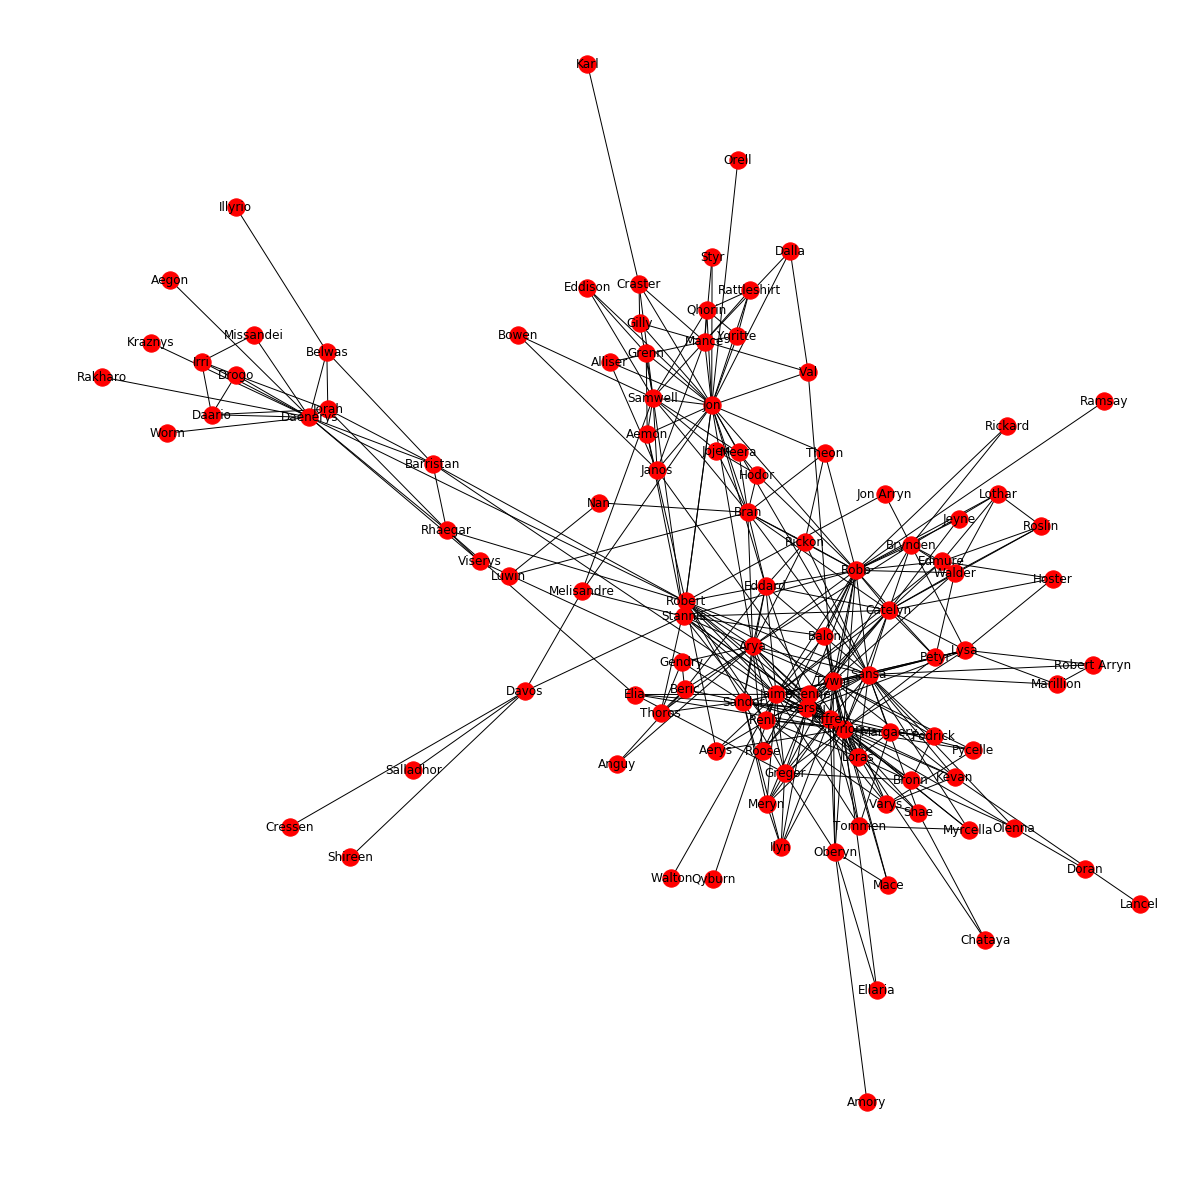

In [12]:
import matplotlib.pyplot as plt
plt.figure(2)
 
# larger figure size
plt.figure(3,figsize=(16,16)) 
nx.draw(G, with_labels = True)

In [13]:
# create & sort by greatest to least
deg = nx.degree_centrality(G)
eigen = nx.eigenvector_centrality(G)
prank = nx.pagerank(G)
close = nx.closeness_centrality(G)
between = nx.betweenness_centrality(G)

ldeg = list(dict(sorted(deg.items(), key=lambda item: item[1], reverse = True)))
leigen = list(dict(sorted(eigen.items(), key=lambda item: item[1], reverse = True)))
lprank = list(dict(sorted(prank.items(), key=lambda item: item[1], reverse = True)))
lclose = list(dict(sorted(close.items(), key=lambda item: item[1], reverse = True)))
lbetween = list(dict(sorted(between.items(), key=lambda item: item[1], reverse = True)))

column_names = ["degree", "eigenvector", "pagerank","closeness", "betweeness"]
df = pd.DataFrame(columns = column_names)
for i in range(len(ldeg)):
    row = [ldeg[i] + "(" + str(deg[ldeg[i]]) + ")",
               leigen[i] + "(" + str(eigen[leigen[i]]) + ")",
               lprank[i] + "(" + str(prank[lprank[i]]) + ")",
               lclose[i] + "(" + str(close[lclose[i]]) + ")",
               lbetween[i] + "(" + str(between[lbetween[i]]) + ")"]
    df.loc[len(df)] = row

In [14]:
df.head(10)

,degree,eigenvector,pagerank,closeness,betweeness
0,Tyrion(0.33962264150943394),Tyrion(0.33663766254996313),Tyrion(0.055447591710774874),Tyrion(0.5120772946859904),Jon(0.22996466368473173)
1,Jon(0.24528301886792453),Sansa(0.27878188816602195),Jon(0.044848169497765177),Sansa(0.5096153846153846),Robert(0.2094523840293194)
2,Sansa(0.24528301886792453),Jaime(0.27366303653172797),Daenerys(0.041097955400774516),Robert(0.5),Tyrion(0.19791284320277353)
3,Robb(0.2358490566037736),Cersei(0.24644869607730555),Jaime(0.03660472005662751),Robb(0.48847926267281105),Daenerys(0.15720345212054956)
4,Jaime(0.22641509433962265),Robb(0.2448454761557984),Sansa(0.03635984896765583),Arya(0.48623853211009177),Robb(0.1269644713830151)
5,Tywin(0.20754716981132074),Joffrey(0.23065949393794508),Robb(0.03412784643493466),Jaime(0.4796380090497738),Sansa(0.12672031668498004)
6,Cersei(0.18867924528301885),Tywin(0.2248558363286332),Bran(0.029003406623936624),Jon(0.4796380090497738),Stannis(0.1026998617273264)
7,Arya(0.1792452830188679),Arya(0.22293108897418834),Samwell(0.028272354636001702),Stannis(0.4796380090497738),Jaime(0.09994344156136246)
8,Robert(0.16981132075471697),Robert(0.19958752278264225),Arya(0.02553359919537514),Tywin(0.4690265486725664),Arya(0.07960711308183888)
9,Joffrey(0.16981132075471697),Catelyn(0.19248526173555658),Joffrey(0.024235897079257794),Eddard(0.4608695652173913),Tywin(0.06553840423231058)


In [18]:
column_names = ["degree", "eigenvector", "pagerank","closeness", "betweeness"]
df = pd.DataFrame(columns = column_names)
for i in range(len(ldeg)):
    row = [ldeg[i] + "(" + str(i+1) + ")",
               leigen[i] + "(" + str(i+1) + ")",
               lprank[i] + "(" + str(i+1) + ")",
               lclose[i] + "(" + str(i+1) + ")",
               lbetween[i] + "(" + str(i+1) + ")"]
    df.loc[len(df)] = row

In [20]:
df.head(12)

,degree,eigenvector,pagerank,closeness,betweeness
0,Tyrion(1),Tyrion(1),Tyrion(1),Tyrion(1),Jon(1)
1,Jon(2),Sansa(2),Jon(2),Sansa(2),Robert(2)
2,Sansa(3),Jaime(3),Daenerys(3),Robert(3),Tyrion(3)
3,Robb(4),Cersei(4),Jaime(4),Robb(4),Daenerys(4)
4,Jaime(5),Robb(5),Sansa(5),Arya(5),Robb(5)
5,Tywin(6),Joffrey(6),Robb(6),Jaime(6),Sansa(6)
6,Cersei(7),Tywin(7),Bran(7),Jon(7),Stannis(7)
7,Arya(8),Arya(8),Samwell(8),Stannis(8),Jaime(8)
8,Robert(9),Robert(9),Arya(9),Tywin(9),Arya(9)
9,Joffrey(10),Catelyn(10),Joffrey(10),Eddard(10),Tywin(10)
